In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import namedtuple, deque
from agent_td import Agent_Td
import torch

In [2]:
env = gym.make('CartPole-v0')
#env = gym.make("Pendulum-v0") #teste
env.seed(0)
print('observation space:', env.observation_space)
print('action space:', env.action_space)

observation space: Box(4,)
action space: Discrete(2)


In [3]:
agent = Agent_Td(state_size=4, action_size=2, seed=0, gamma=1, alpha= 1e-3)

# watch an untrained agent
state = env.reset()
for j in range(4000):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break
env.close()

In [4]:
def dqn(n_episodes=800, max_t=1000, eps_start=1e0, eps_end= 1e-2, eps_decay=0.955, disp = False):#eps_de0.955
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    best_avg = -np.inf
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        action = agent.act(state, eps)
        for t in range(max_t):
           
            next_state, reward, done, _ = env.step(action)
            if disp : env.render()
            score += reward
            if not done:
                
                # pick next action A'
                next_action =  agent.act(next_state, eps)
                # update TD estimate of Q
                agent.step(state, action, reward, next_state,next_action, done)
                # S <- S'
                state = next_state
                # A <- A'
                action = next_action
            if done:
                break
        
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\t eps:{:.2e}\t best_avg:{:.2f}'.format(i_episode, np.mean(scores_window),eps,best_avg))
        if np.mean(scores_window)>=195.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            if np.mean(scores_window) > best_avg:
                torch.save(agent.qnetwork.state_dict(), 'checkpoint.pth')
                best_avg = np.mean(scores_window) 
            break
    if disp: env.close()
    return scores

scores = dqn(disp = False)


Episode 100	Average Score: 45.39	 eps:1.00e-02	 best_avg:-inf
Episode 200	Average Score: 144.90	 eps:1.00e-02	 best_avg:-inf
Episode 281	Average Score: 195.14
Environment solved in 181 episodes!	Average Score: 195.14


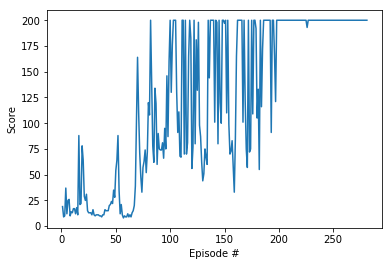

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [4]:
env = gym.make('CartPole-v0')
agent.qnetwork.load_state_dict(torch.load('checkpoint.pth'))
for _ in range(3):
    state = env.reset()
    for t in range(15000):
        action = agent.act(state)
        env.render( )
        state, reward, done, _ = env.step(action)
        if done:
            break 

env.close()